In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Выгрузка нужных таблиц
data = pd.read_csv('/content/drive/My Drive/Соревнование/train.csv')
addresses = pd.read_csv('/content/drive/My Drive/Соревнование/addresses.csv')
shipments = pd.read_csv('/content/drive/My Drive/Соревнование/shipments.csv')
messages = pd.read_csv('/content/drive/My Drive/Соревнование/messages.csv')

In [3]:
train_proba = data[data['order_completed_at'] == '2020-07'].reset_index(drop = True)
train_proba = train_proba.drop(['order_completed_at'], axis=1)
train_proba.index = train_proba['phone_id']
train_proba = train_proba.drop(['phone_id'], axis=1)

In [4]:
#идея - рассматривать историю каждого клиента по отдельности, поэтому в трейне оставим последний таргет (июль)
train_proba

,target
phone_id,
19843,1.0
173074,0.0
101944,0.0
615032,0.0
342522,0.0
...,...
137908,0.0
594974,1.0
320024,0.0


In [5]:
shipments = shipments.drop(['Unnamed: 0'], axis = 1)
shipments.rename(columns=lambda x: x.replace('ship_address_id', 'id'), inplace=True)

In [6]:
shipments = shipments.drop_duplicates()
addresses = addresses.drop_duplicates()

In [7]:
data_first = shipments.merge(addresses, how = "left" ,on = 'id')
data_first = data_first.dropna()
data_first['order_completed_at'] = pd.to_datetime(data_first['order_completed_at'])
data_first['month'] = data_first['order_completed_at'].dt.month
data_first
#таблица с доставками (shipment_id - уникальный тут)

,index,user_id,id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,phone_id,month
0,0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,21,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54,78177,2
1,1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,10,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40,96681,1
2,2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,21,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53,140317,2
3,3,21412,61962,421048,3030227,2018-03-07 20:37:27,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,8,158.0,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32,16,1
4,4,42110,378297,442659,2923996,2017-12-24 11:19:04,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,2,163.0,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37,60075,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258421,870493,54917,12020033,9908837,15347637,2020-08-21 07:43:38,2020-08-31 17:37:59,2020-08-31 20:00:00,METRO,complete,shipped,Москва,68,1.0,4,courier,0.0,9470,app,ios,2020-08-31 20:31:21,51342,8
2258681,870753,1875757,11295116,9909472,14566475,2020-08-06 17:28:22,2020-08-31 17:42:22,2020-08-31 20:00:00,Лента,complete,shipped,Краснодар,132,199.0,5,courier,0.0,16323,app,ios,2020-08-31 20:44:31,283294,8
2258731,870803,2493539,12522717,9909602,15890879,2020-08-31 14:32:56,2020-08-31 18:18:02,2020-08-31 20:00:00,Лента,complete,shipped,Краснодар,139,1.0,5,courier,-250.0,17880,app,ios,2020-08-31 20:26:12,418429,8
2258944,871016,1599317,11365990,9910341,14642755,2020-08-08 10:43:09,2020-08-31 18:10:45,2020-08-31 20:00:00,METRO,complete,shipped,Москва,1,158.0,1,courier,0.0,19640,app,ios,2020-08-31 21:07:57,22648,8


In [8]:
data_first['order_completed_at'] = pd.to_datetime(data_first['order_completed_at'])
data_first['shipped_at'] = pd.to_datetime(data_first['shipped_at'])
data_first['time_shipp'] = data_first['shipped_at'] - data_first['order_completed_at']
data_first['time_shipp'] = data_first['time_shipp'].dt.total_seconds()
data_first['time_shipp'] /= 60*60
#разница между доставленным заказом и завершением заказа (сколько пришло времени в часах)

In [9]:
data_first

,index,user_id,id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,phone_id,month,time_shipp
0,0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,21,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54,78177,2,42.031667
1,1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,10,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40,96681,1,5.020556
2,2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,21,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53,140317,2,23.906944
3,3,21412,61962,421048,3030227,2018-03-07 20:37:27,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,8,158.0,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32,16,1,7.943333
4,4,42110,378297,442659,2923996,2017-12-24 11:19:04,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,2,163.0,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37,60075,1,5.348056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258421,870493,54917,12020033,9908837,15347637,2020-08-21 07:43:38,2020-08-31 17:37:59,2020-08-31 20:00:00,METRO,complete,shipped,Москва,68,1.0,4,courier,0.0,9470,app,ios,2020-08-31 20:31:21,51342,8,2.889444
2258681,870753,1875757,11295116,9909472,14566475,2020-08-06 17:28:22,2020-08-31 17:42:22,2020-08-31 20:00:00,Лента,complete,shipped,Краснодар,132,199.0,5,courier,0.0,16323,app,ios,2020-08-31 20:44:31,283294,8,3.035833
2258731,870803,2493539,12522717,9909602,15890879,2020-08-31 14:32:56,2020-08-31 18:18:02,2020-08-31 20:00:00,Лента,complete,shipped,Краснодар,139,1.0,5,courier,-250.0,17880,app,ios,2020-08-31 20:26:12,418429,8,2.136111
2258944,871016,1599317,11365990,9910341,14642755,2020-08-08 10:43:09,2020-08-31 18:10:45,2020-08-31 20:00:00,METRO,complete,shipped,Москва,1,158.0,1,courier,0.0,19640,app,ios,2020-08-31 21:07:57,22648,8,2.953333


In [ ]:
#выгрузка данных о покупках за июнь, июль и август

In [10]:
june = pd.read_csv('/content/drive/My Drive/Соревнование/june.csv')
june = june[['user_id', 'fresh vegie q', 'fresh fruit q',	'others q', 'price']]

In [11]:
july = pd.read_csv('/content/drive/My Drive/Соревнование/july.csv')
july = july[['user_id', 'fresh vegie q', 'fresh fruit q',	'others q', 'price']]

In [12]:
august = pd.read_csv('/content/drive/My Drive/Соревнование/august.csv')
august = august[['user_id', 'fresh vegie q', 'fresh fruit q',	'others q', 'price']]

In [13]:
data_first

,index,user_id,id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,phone_id,month,time_shipp
0,0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,21,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54,78177,2,42.031667
1,1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,10,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40,96681,1,5.020556
2,2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,shipped,Москва,21,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53,140317,2,23.906944
3,3,21412,61962,421048,3030227,2018-03-07 20:37:27,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,shipped,Москва,8,158.0,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32,16,1,7.943333
4,4,42110,378297,442659,2923996,2017-12-24 11:19:04,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,shipped,Москва,2,163.0,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37,60075,1,5.348056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258421,870493,54917,12020033,9908837,15347637,2020-08-21 07:43:38,2020-08-31 17:37:59,2020-08-31 20:00:00,METRO,complete,shipped,Москва,68,1.0,4,courier,0.0,9470,app,ios,2020-08-31 20:31:21,51342,8,2.889444
2258681,870753,1875757,11295116,9909472,14566475,2020-08-06 17:28:22,2020-08-31 17:42:22,2020-08-31 20:00:00,Лента,complete,shipped,Краснодар,132,199.0,5,courier,0.0,16323,app,ios,2020-08-31 20:44:31,283294,8,3.035833
2258731,870803,2493539,12522717,9909602,15890879,2020-08-31 14:32:56,2020-08-31 18:18:02,2020-08-31 20:00:00,Лента,complete,shipped,Краснодар,139,1.0,5,courier,-250.0,17880,app,ios,2020-08-31 20:26:12,418429,8,2.136111
2258944,871016,1599317,11365990,9910341,14642755,2020-08-08 10:43:09,2020-08-31 18:10:45,2020-08-31 20:00:00,METRO,complete,shipped,Москва,1,158.0,1,courier,0.0,19640,app,ios,2020-08-31 21:07:57,22648,8,2.953333


In [14]:
data_first = data_first.merge(june, how = 'left', on='user_id')

In [15]:
data_first = data_first.merge(july, how = 'left', on='user_id')

In [16]:
data_first = data_first.merge(august, how = 'left', on='user_id')

In [17]:
data_first = data_first.fillna(0)

In [18]:
del messages['action_id']
data_first = data_first.merge(messages, on = 'user_id')
#добавление признаков из messages (сообщения клиентам)

In [19]:
data_first.groupby(by = ['phone_id', 'month']).size()
orders_monthly = data_first.groupby( by = ['phone_id', 'month'])["id"].aggregate("count").unstack()
del orders_monthly[12]
orders_monthly = orders_monthly.fillna(0)

In [20]:
Y_test = orders_monthly[8]

In [21]:
Y_test

phone_id
2         0.0
3         0.0
4         0.0
6         0.0
9         0.0
         ... 
719365    1.0
719366    1.0
719369    1.0
719370    1.0
719374    1.0
Name: 8, Length: 532636, dtype: float64

In [22]:
orders_monthly['freq'] = orders_monthly[1] + orders_monthly[2] + orders_monthly[3] + orders_monthly[4] + orders_monthly[5] + orders_monthly[6] + orders_monthly[7]

In [23]:
orders_monthly
#кол-во заказов за 4 периода (которые даны) + общее кол-во для каждого человека

month,1,2,3,4,5,6,7,8,freq
phone_id,,,,,,,,,
2,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
3,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,4.0
4,0.0,0.0,1.0,3.0,2.0,2.0,0.0,0.0,8.0
6,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,9.0
9,0.0,0.0,0.0,3.0,4.0,2.0,3.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...
719365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
719366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
719369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
orders_monthly_train = orders_monthly.drop([8], axis=1)

In [25]:
orders_monthly_train

month,1,2,3,4,5,6,7,freq
phone_id,,,,,,,,
2,1.0,2.0,1.0,0.0,1.0,0.0,0.0,5.0
3,0.0,0.0,2.0,0.0,1.0,0.0,1.0,4.0
4,0.0,0.0,1.0,3.0,2.0,2.0,0.0,8.0
6,3.0,2.0,2.0,1.0,0.0,1.0,0.0,9.0
9,0.0,0.0,0.0,3.0,4.0,2.0,3.0,12.0
...,...,...,...,...,...,...,...,...
719365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
719369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
weight_monthly = data_first.groupby( by = ['phone_id', 'month'])["total_weight"].aggregate("sum").unstack()
del weight_monthly[12]
weight_monthly = weight_monthly.fillna(0)

In [27]:
Y_test_1 = weight_monthly[8]

In [28]:
weight_monthly_avg = weight_monthly / orders_monthly

In [29]:
weight_monthly_avg = weight_monthly_avg.fillna(0)

In [30]:
del weight_monthly_avg['freq']

In [31]:
weight_monthly_train_avg = weight_monthly_avg.drop([8], axis = 1)

In [32]:
train_proba = train_proba.merge(orders_monthly_train, on='phone_id')

In [33]:
train_proba = train_proba.merge(weight_monthly_train_avg, on='phone_id')

In [34]:
train_proba

,target,1_x,2_x,3_x,4_x,5_x,6_x,7_x,freq,1_y,2_y,3_y,4_y,5_y,6_y,7_y
phone_id,,,,,,,,,,,,,,,,
19843,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9306.0,0.0,0.0,0.0,0.0,0.0
173074,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3225.0,0.0,0.0
101944,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,555.0,0.0,2470.0,0.0,0.0
615032,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2607.0,25920.0,0.0,0.0
342522,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7515.0,0.0,0.0,0.0,0.0,0.0,15150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137908,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,64190.0,0.0,6320.0,0.0,0.0,0.0,0.0
594974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,12947.5
320024,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,84025.0,5263.0,1820.0


In [35]:
data_first

,index,user_id,id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,phone_id,month,time_shipp,fresh vegie q_x,fresh fruit q_x,others q_x,price_x,fresh vegie q_y,fresh fruit q_y,others q_y,price_y,fresh vegie q,fresh fruit q,others q,price,tone,last_date,count
0,0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,shipped,Москва,21,168.0,0,courier,0.000000,30170,web,windows,2020-02-20 08:08:54,78177,2,42.031667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,2020-02-19 14:07:09,1
1,1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,shipped,Москва,10,98.0,0,courier,-150.000000,11305,web,windows,2020-01-03 18:10:40,96681,1,5.020556,0.0,0.0,2.0,5168.589998,0.0,1.0,0.0,4693.480009,0.0,0.0,0.0,0.0,5.0,2020-06-04 14:33:28,5
2,679341,62278,262002,6886956,3008179,2018-02-23 14:58:22,2020-06-15 16:15:16,2020-06-15 18:00:00,METRO,complete,shipped,Москва,10,0.0,1,courier,0.000000,30325,app,ios,2020-06-15 19:17:06,96681,6,3.030556,0.0,0.0,2.0,5168.589998,0.0,1.0,0.0,4693.480009,0.0,0.0,0.0,0.0,5.0,2020-06-04 14:33:28,5
3,730048,62278,8967167,7032326,12039778,2020-06-15 16:15:42,2020-06-18 18:12:38,2020-06-19 06:00:00,METRO,complete,shipped,Москва,10,0.0,5,courier,0.000000,13916,app,ios,2020-06-19 06:39:30,96681,6,12.447778,0.0,0.0,2.0,5168.589998,0.0,1.0,0.0,4693.480009,0.0,0.0,0.0,0.0,5.0,2020-06-04 14:33:28,5
4,18261,62278,9129702,7261562,12229304,2020-06-18 18:12:40,2020-07-28 23:29:10,2020-07-29 07:00:00,METRO,complete,shipped,Москва,10,0.0,4,courier,0.000000,10425,app,ios,2020-07-29 07:33:28,96681,7,8.071667,0.0,0.0,2.0,5168.589998,0.0,1.0,0.0,4693.480009,0.0,0.0,0.0,0.0,5.0,2020-06-04 14:33:28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936659,869295,2921428,12526279,9906180,15894945,2020-08-31 16:07:05,2020-08-31 16:21:59,2020-08-31 19:00:00,METRO,complete,shipped,Москва,8,0.0,0,courier,0.000000,22900,web,windows,2020-08-31 19:42:08,643489,8,3.335833,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,2020-08-31 16:05:29,1
1936660,869316,2921463,12231709,9906308,15581181,2020-08-25 16:10:46,2020-08-31 16:35:15,2020-08-31 17:00:00,ВкусВилл,complete,shipped,Москва,484,0.0,0,express_delivery,-166.050003,10490,app,ios,2020-08-31 17:28:57,595924,8,0.895000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,2020-08-31 17:29:02,15
1936661,870004,2923209,12357002,9907865,15716313,2020-08-28 09:33:24,2020-08-31 17:37:22,2020-08-31 20:00:00,Лента,complete,shipped,Краснодар,139,0.0,5,courier,-200.000000,25440,app,android,2020-08-31 19:43:40,620941,8,2.105000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,2020-08-31 18:07:33,5
1936662,870097,2871127,12284853,9908047,15639199,2020-08-26 20:28:13,2020-08-31 17:26:47,2020-08-31 19:00:00,Лента,complete,shipped,Краснодар,139,0.0,0,courier,-250.000000,11939,web,windows,2020-08-31 19:26:19,425262,8,1.992222,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.0,2020-08-29 21:33:41,3


In [36]:
das = data_first[['phone_id', 'time_shipp', 'tone', 'count', 'fresh vegie q_x', 'fresh fruit q_x', 	'others q_x', 'price_x', 'fresh vegie q_y', 'fresh fruit q_y', 	'others q_y', 'price_y', 'fresh vegie q', 'fresh fruit q', 	'others q', 'price']]

In [37]:
das = das.groupby( by = ['phone_id']).sum()

In [38]:
train_proba = train_proba.merge(das, on='phone_id')

In [39]:
train_proba

,target,1_x,2_x,3_x,4_x,5_x,6_x,7_x,freq,1_y,2_y,3_y,4_y,5_y,6_y,7_y,time_shipp,tone,count,fresh vegie q_x,fresh fruit q_x,others q_x,price_x,fresh vegie q_y,fresh fruit q_y,others q_y,price_y,fresh vegie q,fresh fruit q,others q,price
phone_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19843,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9306.0,0.0,0.0,0.0,0.0,0.0,2.229167,0.0,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
173074,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3225.0,0.0,0.0,18.311667,0.0,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
101944,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,555.0,0.0,2470.0,0.0,0.0,32.570833,9.0,18,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
615032,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2607.0,25920.0,0.0,0.0,28.818889,18.0,176,0.0,0.0,96.0,1713.040031,0.0,0.0,0.0,161.959999,0.0,0.0,0.0,0.0
342522,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7515.0,0.0,0.0,0.0,0.0,0.0,15150.0,80.396667,10.0,32,8.0,2.0,24.0,10923.020027,8.0,10.0,10.0,10956.220020,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137908,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,64190.0,0.0,6320.0,0.0,0.0,0.0,0.0,127.525000,22.0,166,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
594974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,12947.5,28.596944,32.0,80,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
320024,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,84025.0,5263.0,1820.0,193.168889,-4.0,28,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,20992.000000,0.0,0.0,0.0,0.0


In [40]:
train_proba = train_proba.drop(['1_x', '2_x', 'fresh fruit q_y', '3_x', '1_y', 'fresh fruit q_x', 'fresh vegie q_y', '2_y', 'fresh vegie q_x', '4_x'], axis=1)

In [41]:
train_proba = train_proba.drop(['fresh vegie q', 'fresh fruit q'], axis = 1)

In [42]:
train_proba = train_proba.drop(['others q_x', 'others q_y', 'others q'], axis = 1)

In [43]:
train_proba

,target,5_x,6_x,7_x,freq,3_y,4_y,5_y,6_y,7_y,time_shipp,tone,count,price_x,price_y,price
phone_id,,,,,,,,,,,,,,,,
19843,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.229167,0.0,1,0.000000,0.000000,0.0
173074,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3225.0,0.0,0.0,18.311667,0.0,1,0.000000,0.000000,0.0
101944,0.0,1.0,0.0,0.0,5.0,555.0,0.0,2470.0,0.0,0.0,32.570833,9.0,18,0.000000,0.000000,0.0
615032,0.0,1.0,0.0,0.0,2.0,0.0,2607.0,25920.0,0.0,0.0,28.818889,18.0,176,1713.040031,161.959999,0.0
342522,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,15150.0,80.396667,10.0,32,10923.020027,10956.220020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137908,0.0,0.0,0.0,0.0,2.0,6320.0,0.0,0.0,0.0,0.0,127.525000,22.0,166,0.000000,0.000000,0.0
594974,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,12947.5,28.596944,32.0,80,0.000000,0.000000,0.0
320024,0.0,2.0,1.0,1.0,4.0,0.0,0.0,84025.0,5263.0,1820.0,193.168889,-4.0,28,0.000000,20992.000000,0.0


In [44]:
na_test = train_proba.drop(['target', 'price_x', '5_x'], axis=1)

In [45]:
na_test = na_test.merge(Y_test, on='phone_id', how='left')
na_test = na_test.merge(Y_test_1, on='phone_id', how='left')

In [46]:
train_proba

,target,5_x,6_x,7_x,freq,3_y,4_y,5_y,6_y,7_y,time_shipp,tone,count,price_x,price_y,price
phone_id,,,,,,,,,,,,,,,,
19843,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.229167,0.0,1,0.000000,0.000000,0.0
173074,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3225.0,0.0,0.0,18.311667,0.0,1,0.000000,0.000000,0.0
101944,0.0,1.0,0.0,0.0,5.0,555.0,0.0,2470.0,0.0,0.0,32.570833,9.0,18,0.000000,0.000000,0.0
615032,0.0,1.0,0.0,0.0,2.0,0.0,2607.0,25920.0,0.0,0.0,28.818889,18.0,176,1713.040031,161.959999,0.0
342522,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,15150.0,80.396667,10.0,32,10923.020027,10956.220020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137908,0.0,0.0,0.0,0.0,2.0,6320.0,0.0,0.0,0.0,0.0,127.525000,22.0,166,0.000000,0.000000,0.0
594974,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,12947.5,28.596944,32.0,80,0.000000,0.000000,0.0
320024,0.0,2.0,1.0,1.0,4.0,0.0,0.0,84025.0,5263.0,1820.0,193.168889,-4.0,28,0.000000,20992.000000,0.0


In [47]:
del na_test['3_y']

In [56]:
train_proba

,target,5_x,6_x,7_x,freq,3_y,4_y,5_y,6_y,7_y,time_shipp,tone,count,price_x,price_y,price
phone_id,,,,,,,,,,,,,,,,
19843,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.229167,0.0,1,0.000000,0.000000,0.0
173074,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3225.0,0.0,0.0,18.311667,0.0,1,0.000000,0.000000,0.0
101944,0.0,1.0,0.0,0.0,5.0,555.0,0.0,2470.0,0.0,0.0,32.570833,9.0,18,0.000000,0.000000,0.0
615032,0.0,1.0,0.0,0.0,2.0,0.0,2607.0,25920.0,0.0,0.0,28.818889,18.0,176,1713.040031,161.959999,0.0
342522,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,15150.0,80.396667,10.0,32,10923.020027,10956.220020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137908,0.0,0.0,0.0,0.0,2.0,6320.0,0.0,0.0,0.0,0.0,127.525000,22.0,166,0.000000,0.000000,0.0
594974,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,12947.5,28.596944,32.0,80,0.000000,0.000000,0.0
320024,0.0,2.0,1.0,1.0,4.0,0.0,0.0,84025.0,5263.0,1820.0,193.168889,-4.0,28,0.000000,20992.000000,0.0


In [50]:
na_test.rename(columns=lambda x: x.replace('6_x', '5_x'), inplace=True)
na_test.rename(columns=lambda x: x.replace('7_x', '6_x'), inplace=True)
na_test.rename(columns=lambda x: x.replace('8_x', '7_x'), inplace=True)
na_test.rename(columns=lambda x: x.replace('price_y', 'price_x'), inplace=True)
na_test.rename(columns=lambda x: x.replace('price', 'price_y'), inplace=True)
na_test.rename(columns=lambda x: x.replace('4_y', '3_y'), inplace=True)
na_test.rename(columns=lambda x: x.replace('5_y', '4_y'), inplace=True)
na_test.rename(columns=lambda x: x.replace('6_y', '5_y'), inplace=True)
na_test.rename(columns=lambda x: x.replace('7_y', '6_y'), inplace=True)
na_test.rename(columns=lambda x: x.replace('8_y', '7_y'), inplace=True)

In [52]:
na_test.rename(columns=lambda x: x.replace('price_y_x', 'price_x'), inplace=True)

In [55]:
na_test = na_test[['5_x', '6_x', '7_x', 'freq', '3_y', '4_y', '5_y', '6_y', '7_y', 'time_shipp', 	'tone', 'count', 'price_x', 'price_y']]

In [57]:
na_test

,5_x,6_x,7_x,freq,3_y,4_y,5_y,6_y,7_y,time_shipp,tone,count,price_x,price_y
phone_id,,,,,,,,,,,,,,
19843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.229167,0.0,1,0.000000,0.0
173074,0.0,0.0,0.0,1.0,0.0,3225.0,0.0,0.0,0.0,18.311667,0.0,1,0.000000,0.0
101944,0.0,0.0,0.0,5.0,0.0,2470.0,0.0,0.0,0.0,32.570833,9.0,18,0.000000,0.0
615032,0.0,0.0,0.0,2.0,2607.0,25920.0,0.0,0.0,0.0,28.818889,18.0,176,161.959999,0.0
342522,0.0,1.0,0.0,2.0,0.0,0.0,0.0,15150.0,0.0,80.396667,10.0,32,10956.220020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137908,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,127.525000,22.0,166,0.000000,0.0
594974,0.0,2.0,2.0,2.0,0.0,0.0,0.0,12947.5,25465.0,28.596944,32.0,80,0.000000,0.0
320024,1.0,1.0,0.0,4.0,0.0,84025.0,5263.0,1820.0,0.0,193.168889,-4.0,28,20992.000000,0.0


In [58]:
train_proba = train_proba.drop(['price'], axis=1)

In [ ]:
train_proba

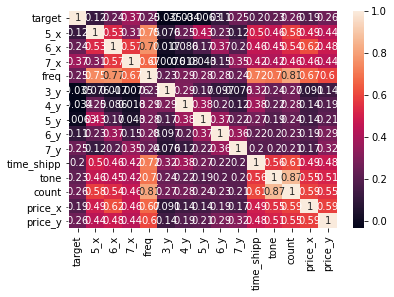

In [59]:
sns.heatmap(train_proba.corr(), annot = True);

In [60]:
Y = train_proba['target']

In [61]:
del train_proba['target']

In [52]:
del train_proba['1_y']

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_proba, Y, test_size=0.3, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=17)
forest.fit(X_train, Y_train)
forest_valid_pred = forest.predict(X_val)

In [64]:
from sklearn.metrics import f1_score

In [65]:
f1_score(forest_valid_pred, Y_val)

0.8105781723689909

In [66]:
def beautiful_coef(coefs, feature_names=X_train.columns):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values('coef',
                                                  ascending=False)

In [67]:
beautiful_coef(forest.feature_importances_)

,coef
count,0.137583
time_shipp,0.133204
tone,0.106858
freq,0.100380
7_y,0.098629
7_x,0.083246
price_y,0.070907
5_y,0.054364
6_y,0.052284
price_x,0.050909


In [68]:
pip install catboost

In [79]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1500, learning_rate=0.01, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)


In [80]:
cate_features_index = np.where(X_train.dtypes != float)[0]

In [81]:
model.fit(X_train,Y_train,cat_features=cate_features_index, eval_set=(X_val,Y_val))

0:	test: 0.8286259	best: 0.8286259 (0)	total: 198ms	remaining: 4m 57s
1:	test: 0.8344058	best: 0.8344058 (1)	total: 427ms	remaining: 5m 20s
2:	test: 0.8381266	best: 0.8381266 (2)	total: 623ms	remaining: 5m 10s
3:	test: 0.8373860	best: 0.8381266 (2)	total: 869ms	remaining: 5m 24s
4:	test: 0.8372638	best: 0.8381266 (2)	total: 1.06s	remaining: 5m 17s
5:	test: 0.8371436	best: 0.8381266 (2)	total: 1.26s	remaining: 5m 14s
6:	test: 0.8377869	best: 0.8381266 (2)	total: 1.48s	remaining: 5m 15s
7:	test: 0.8380772	best: 0.8381266 (2)	total: 1.7s	remaining: 5m 17s
8:	test: 0.8384693	best: 0.8384693 (8)	total: 1.93s	remaining: 5m 19s
9:	test: 0.8387655	best: 0.8387655 (9)	total: 2.13s	remaining: 5m 16s
10:	test: 0.8390341	best: 0.8390341 (10)	total: 2.33s	remaining: 5m 15s
11:	test: 0.8394040	best: 0.8394040 (11)	total: 2.54s	remaining: 5m 14s
12:	test: 0.8394983	best: 0.8394983 (12)	total: 2.73s	remaining: 5m 11s
13:	test: 0.8398811	best: 0.8398811 (13)	total: 2.95s	remaining: 5m 13s
14:	test: 0.8

In [82]:
prediction = model.predict(X_val)

Лучшая модель на трейне - 0.86 CatBoostClassifier

In [83]:
f1_score(prediction, Y_val)

0.867590402162893

In [75]:
import xgboost as xgb

model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model2 = model2.fit(X_train, Y_train)

In [76]:
predict_y_2 = model2.predict(X_val)

In [77]:
f1_score(predict_y_2, Y_val)

0.8164777680906714

In [84]:
test = pd.read_csv('sample_submission.csv', sep=';')
test["phone_id"] = test["Id"].copy()
del test["Id"]
test

,Predicted,phone_id
0,NaN,19843
1,NaN,471287
2,NaN,342522
3,NaN,457799
4,NaN,233778
...,...,...
214604,NaN,16841
214605,NaN,69348
214606,NaN,594974
214607,NaN,320024


In [ ]:
na_test

In [85]:
test1 = test.merge(na_test, on='phone_id', how = "left")
test1 = test1.fillna(0)
del test1['Predicted']
test1.index = test1['phone_id']

In [86]:
del test1['phone_id']

In [ ]:
test1

In [ ]:
pred = model2.predict(test1)

In [89]:
test1 = round(test1)

In [90]:
test1 = test1.fillna(0)

In [91]:
test1 = test1.astype(int)

In [92]:
Y_ans = model.predict(test1)

In [93]:
Ypd = pd.DataFrame({'Predicted' : Y_ans})
Ypd['Id'] = test['phone_id']
Ypd = Ypd[['Id', 'Predicted']]
Ypd['Predicted'] = Ypd['Predicted'].astype(int)
Ypd.to_csv('my_solution.csv', index=False)

In [94]:
Ypd

,Id,Predicted
0,19843,0
1,471287,1
2,342522,1
3,457799,1
4,233778,1
...,...,...
214604,16841,1
214605,69348,0
214606,594974,1
214607,320024,0
